In [1]:
%matplotlib inline
import torch
from ffebm.ffebm_1layer_testing import load_modules, test_ebm_generation, visual_samples_ebm
CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:0')
print('torch:', torch.__version__, 'CUDA:', CUDA)
sample_size = 10
latent_dim = 32
hidden_dim = 128
mnist_size = 28
patch_size = 3
pixel_dim = patch_size**2
num_patches = mnist_size - patch_size + 1
lr = 1e-4
## EBM hyper-parameters
data_noise_std = 0.0
reg_alpha = 0.0
LOAD_VERSION = 'mnist-ffebm-1layer-%.2Elr-%.2Elatentdim-%.2Eregalpha-%.2Edata_noise_std' % (lr, latent_dim, reg_alpha, data_noise_std) 
ebm, proposal = load_modules(pixel_dim, hidden_dim, latent_dim, LOAD_VERSION, CUDA, DEVICE)

torch: 1.3.0 CUDA: True
Loading EBM, proposal and optimizer...


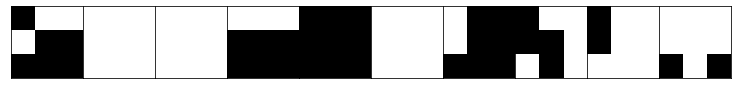

In [2]:
test_sample_size = 10
images_ebm = test_ebm_generation(ebm, proposal, test_sample_size)
visual_samples_ebm(images_ebm)

In [5]:
import numpy as np
energy_data= []
energy_ebm = []
f = open('../results/log-mnist-ffebm-1layer-1.00E-04lr-3.20E+01latentdim-0.00E+00regalpha-0.00E+00data_noise_std.txt')
for line in f.readlines():
    line = line.strip().split(',  ')
    energy_data.append(float(line[-2][12:]))
    energy_ebm.append(float(line[-1][11:]))
energy_data = np.array(energy_data)
energy_ebm = np.array(energy_ebm)

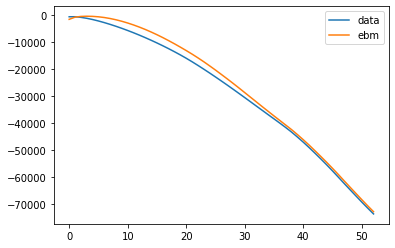

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(energy_data, label='data')
plt.plot(energy_ebm, label='ebm')
plt.legend()